# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('train.csv')# load the dataset

In [22]:
df.head() # check the top 5 entries

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [23]:
df.shape

(31647, 18)

In [203]:
df.info()# as we can see our dataset contains both continuous and categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
df.isnull().sum().sum()# no null data in our dataset

0

In [25]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [3]:
df = df.drop('ID', axis = 1)

In [10]:
df.shape

(31647, 17)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [26]:
#find that which column is categorical and which is numerical
data_types = df.dtypes

categorical_cols = data_types[data_types == 'object'].index.tolist()

numerical_cols = data_types[data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_cols)
print()

# Print the numerical columns
print("Numerical Columns:")
print(numerical_cols)


Categorical Columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

Numerical Columns:
['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
# Find unique values in categorical columns
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print("\n")



Unique values in job:
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']


Unique values in marital:
['married' 'divorced' 'single']


Unique values in education:
['unknown' 'secondary' 'tertiary' 'primary']


Unique values in default:
['no' 'yes']


Unique values in housing:
['no' 'yes']


Unique values in loan:
['no' 'yes']


Unique values in contact:
['telephone' 'cellular' 'unknown']


Unique values in month:
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']


Unique values in poutcome:
['unknown' 'success' 'failure' 'other']


Unique values in subscribed:
['no' 'yes']




# VISUALIZATION

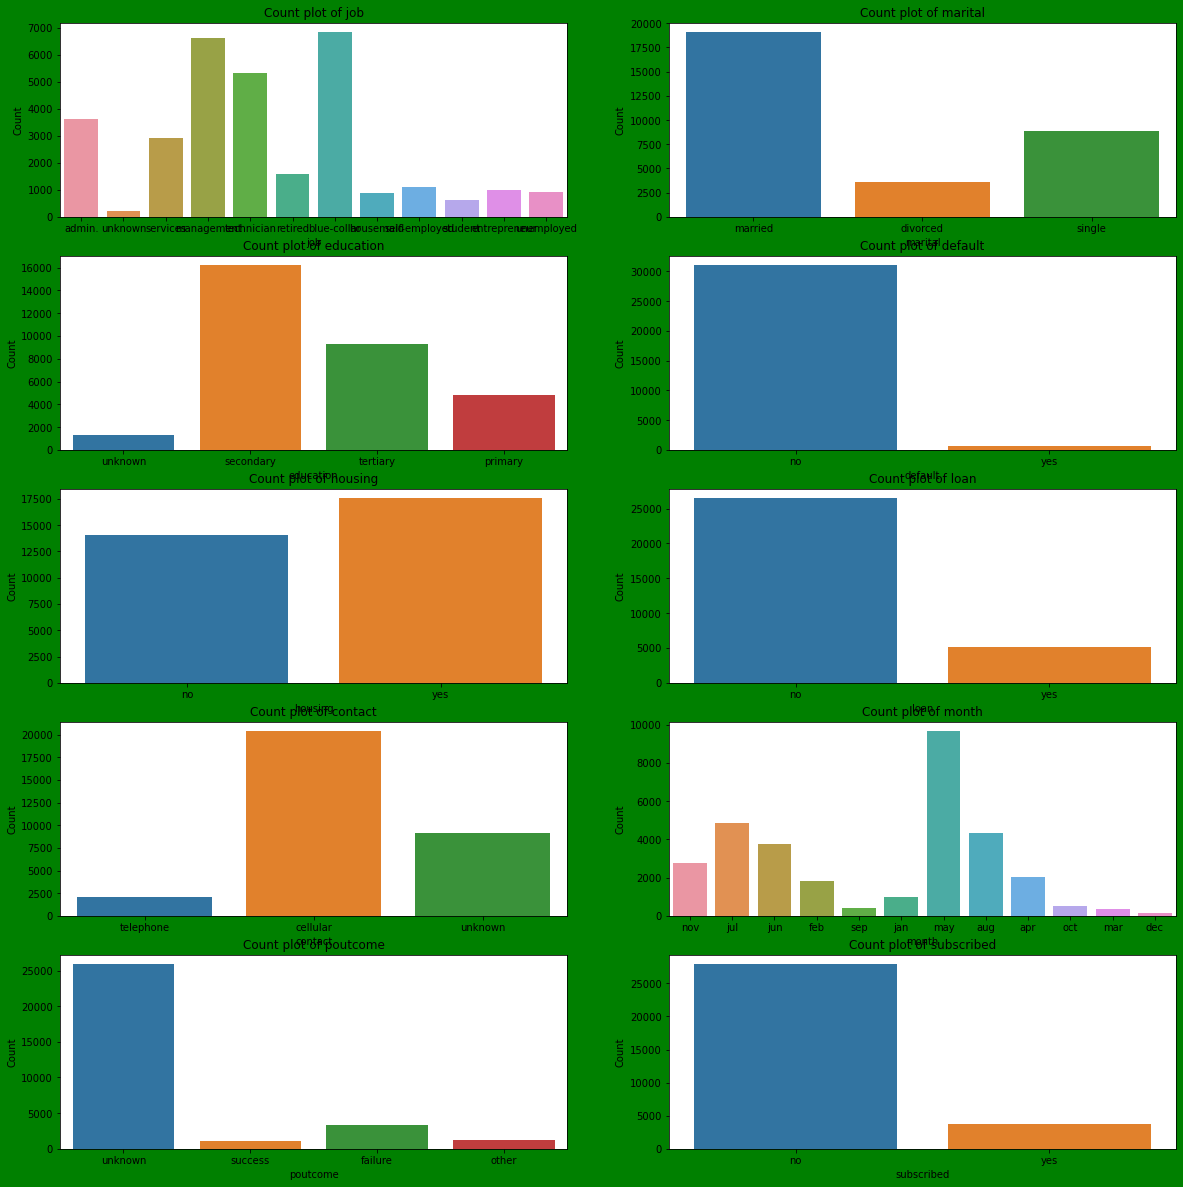

In [14]:
# Create count plots for each column

plt.figure(figsize = (20,25), facecolor = 'green')
plotnumber = 1

for column in categorical_cols:
     if plotnumber <=12:
        ax = plt.subplot(6,2, plotnumber)
        sns.countplot(data=df, x=column)
        plt.title(f"Count plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plotnumber +=1
plt.show()


In [27]:
df['default'].value_counts()# as we can see this feature does not play important role as 95% data is biased towards no

no     31062
yes      585
Name: default, dtype: int64

In [28]:
df = df.drop('default', axis = 1)

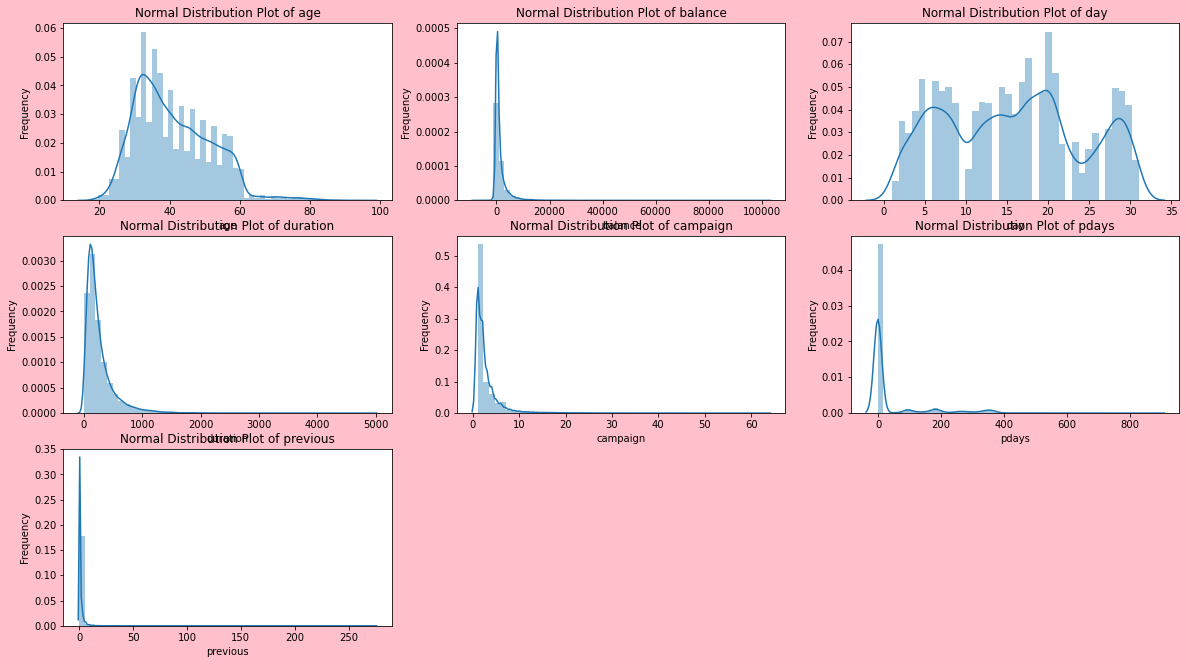

In [17]:
#check the distribution of our numerical columns

plt.figure(figsize = (20, 15), facecolor = 'pink')
graph = 1
for column in numerical_cols:  
    ax = plt.subplot(4,3, graph)
    sns.distplot(df[column], kde=True)
    plt.title(f"Normal Distribution Plot of {column}")
    plt.ylabel("Frequency")
    graph+=1
plt.show()


In [ ]:
#it shows that our data is left skewed

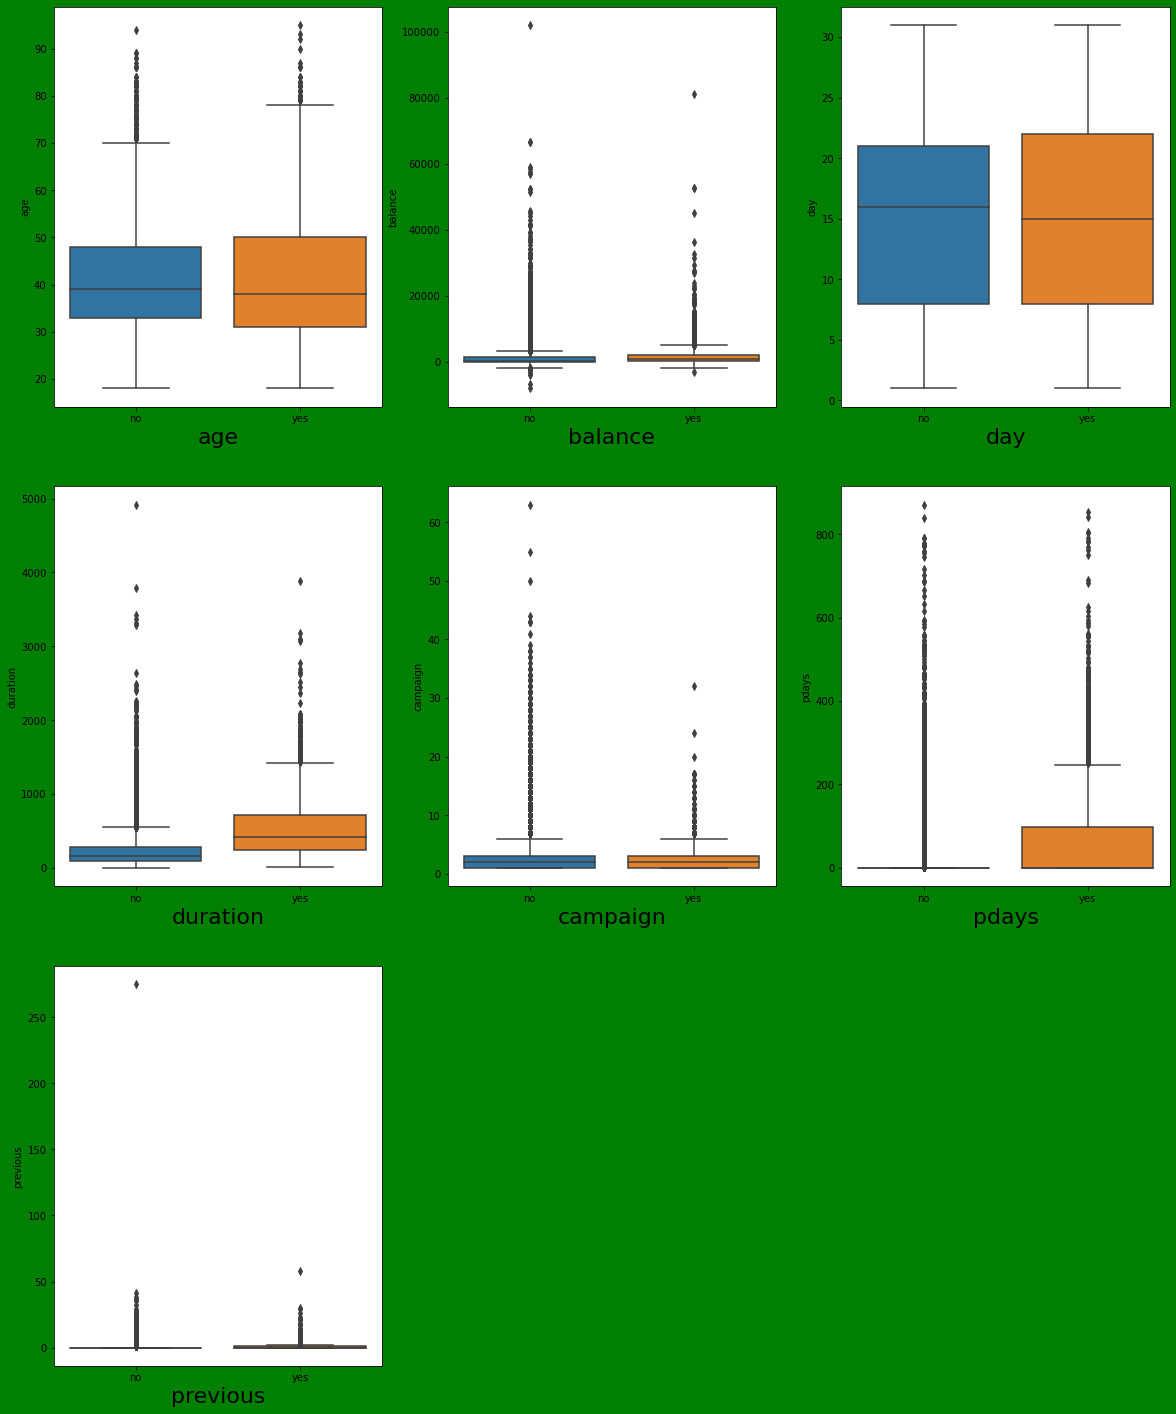

In [18]:
plt.figure(figsize = (20,25), facecolor = 'green')
plotnumber = 1

for column in numerical_cols:
    if plotnumber <=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(data=df, x=df['subscribed'], y=column)
        plt.xlabel(column, fontsize = 22)
        
    plotnumber +=1
plt.show()

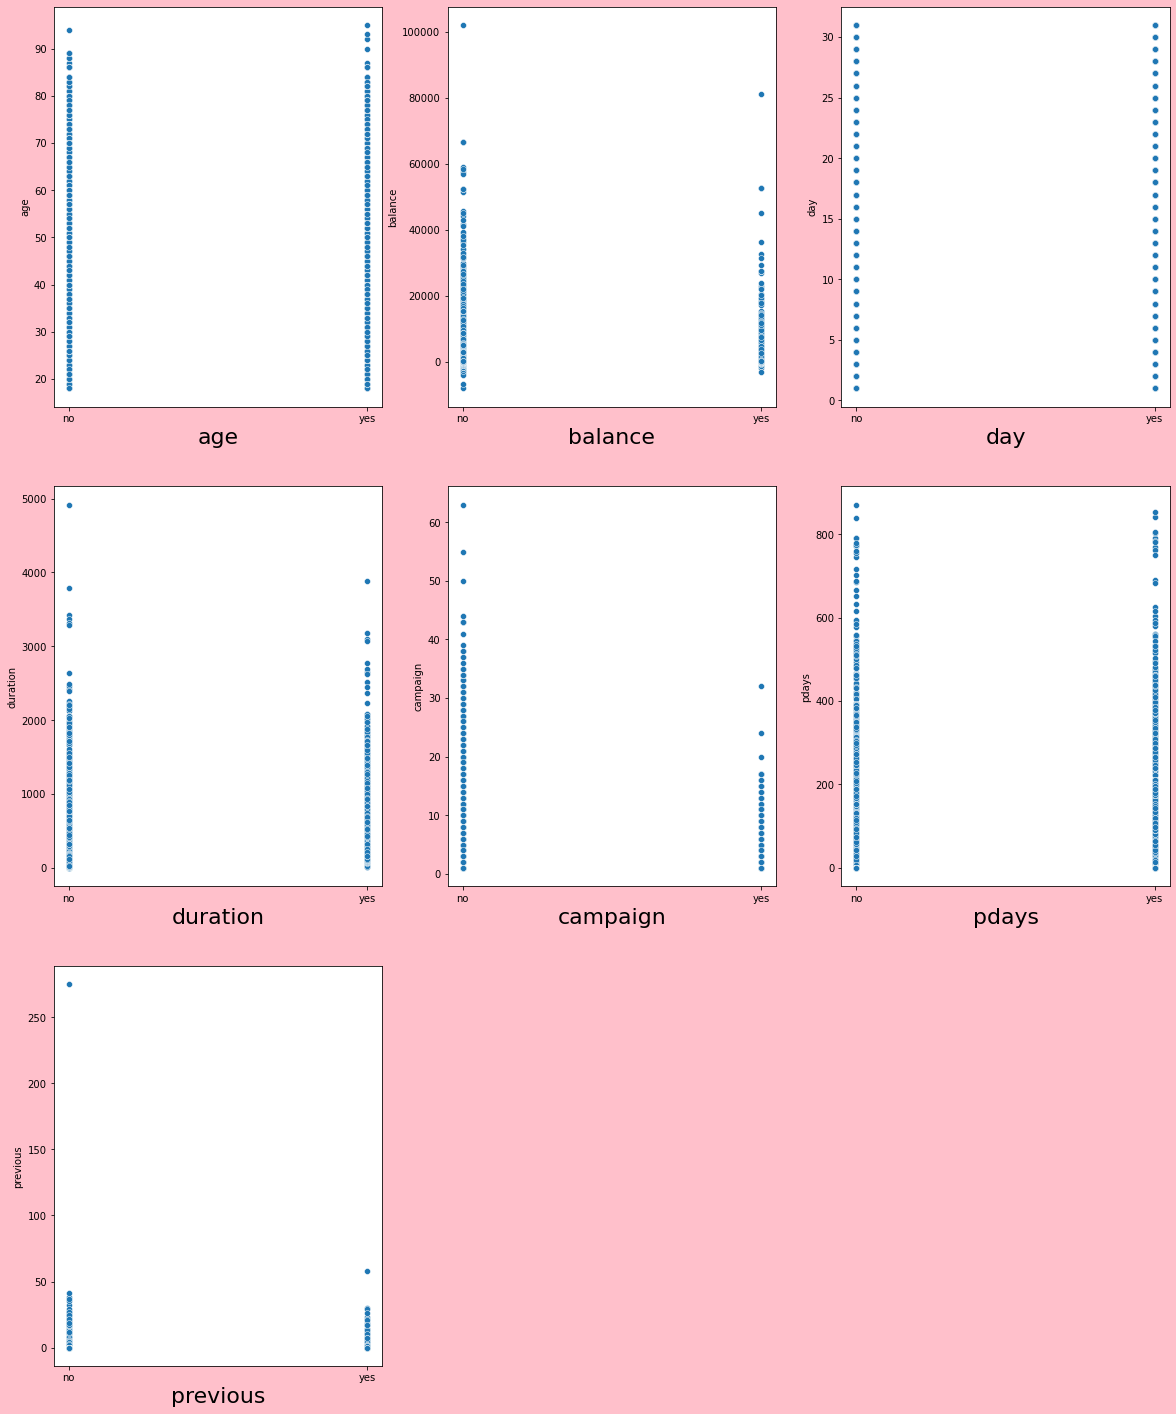

In [19]:
plt.figure(figsize = (20,25), facecolor = 'pink')
plotnumber = 1

for column in numerical_cols:
    if plotnumber <=9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(data=df, x=df['subscribed'], y=column)
        plt.xlabel(column, fontsize = 22)
        
    plotnumber +=1
plt.show() 

In [20]:
corr = df.corr()

In [21]:
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<AxesSubplot:>

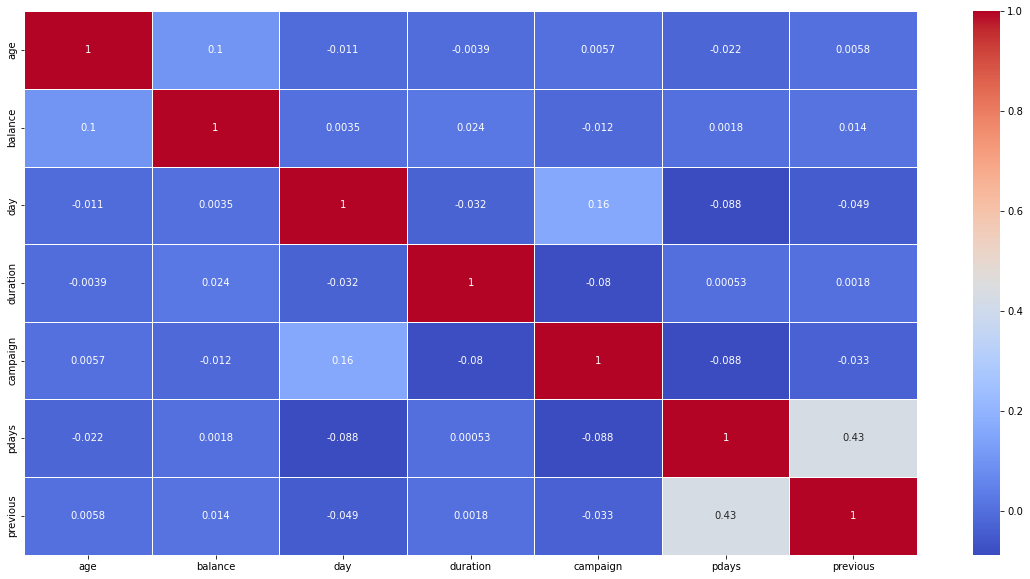

In [22]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap(data = corr, annot = True, linewidth = 0.5, linecolor = 'white', cmap="coolwarm")

In [ ]:
# Remove the outliers

In [29]:
df.head(10)

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [30]:
# now as we can see our dataset has 4 column with boolean values of yes and no so we can covert it to '0' and '1'

yes_no_mapping = {'yes': 1, 'no': 0}
columns_to_map = ['loan', 'housing', 'subscribed']  
df[columns_to_map] = df[columns_to_map].replace(yes_no_mapping)


In [31]:
df.head()

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0


In [32]:
from scipy.stats import zscore

In [33]:
z_score = zscore(df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays']])

In [34]:
abs_z_score = np.abs(z_score)

In [35]:
filtering_entry = (abs_z_score<3).all(axis = 1)

In [36]:
df_new = df[filtering_entry]

In [37]:
df_new.shape

(28434, 17)

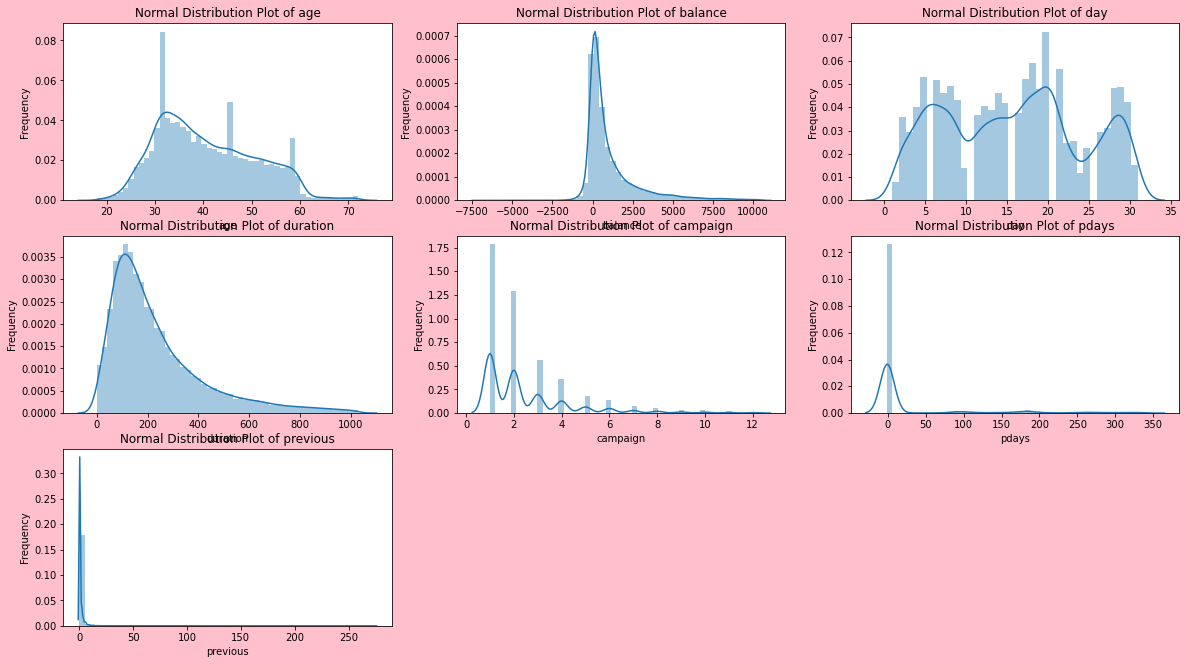

In [32]:
#now again check the distribution of our numerical columns after removing the outliers

plt.figure(figsize = (20, 15), facecolor = 'pink')
graph = 1
for column in numerical_cols:  
    ax = plt.subplot(4,3, graph)
    sns.distplot(df_new[column], kde=True)
    plt.title(f"Normal Distribution Plot of {column}")
    plt.ylabel("Frequency")
    graph+=1
plt.show()


In [38]:
df.shape

(31647, 17)

In [39]:
df_new.shape

(28434, 17)

In [40]:
df_new.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [41]:
df.head(1)

,ID,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0


In [42]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [43]:
new_df = pd.get_dummies(df_new, columns=cat_columns, drop_first = True)

new_df.head()


,ID,age,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,0,0,19,44,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,40576,31,3,0,0,20,91,2,-1,0,...,1,0,0,0,0,0,0,0,0,1
2,15320,27,891,1,0,18,240,1,-1,0,...,1,0,0,0,0,0,0,0,0,1
3,43962,57,3287,0,0,22,867,1,84,3,...,0,1,0,0,0,0,0,0,1,0
4,29842,31,119,1,0,4,380,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
new_df.shape

(28434, 43)

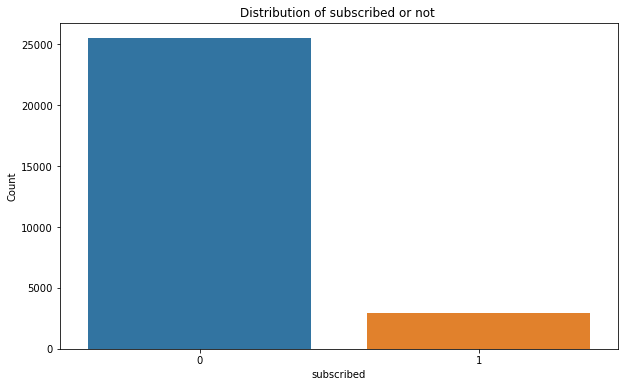

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x="subscribed", data=new_df)
plt.title("Distribution of subscribed or not ")
plt.xlabel("subscribed")
plt.ylabel("Count")
plt.show()

In [46]:
new_df['subscribed'].value_counts()# as we can see our data is imbalanced so we have to balance our dataset

0    25496
1     2938
Name: subscribed, dtype: int64

In [47]:
# Split the data into features (X) and target variable (y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x = new_df.drop(columns = ['subscribed'])
y = new_df['subscribed']



In [48]:
# Now balance our dataset 
from imblearn.over_sampling import SMOTE

In [49]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [50]:
y.value_counts()  # Hence we have balanced our dataset and now we can proceed ahaed

0    25496
1    25496
Name: subscribed, dtype: int64

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=509)

# MODEL TRAINING

In [52]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression()

In [54]:
models = {"Decision Tree": decision_tree,
          "Random Forest": random_forest,
          "SVM": svm,
          "K-Nearest Neighbors": knn,
          "Logistic Regression": logistic_regression}

In [55]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")


--- Decision Tree ---
Accuracy: 0.9235
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5032
           1       0.92      0.93      0.92      5167

    accuracy                           0.92     10199
   macro avg       0.92      0.92      0.92     10199
weighted avg       0.92      0.92      0.92     10199


--- Random Forest ---
Accuracy: 0.9537
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5032
           1       0.95      0.96      0.95      5167

    accuracy                           0.95     10199
   macro avg       0.95      0.95      0.95     10199
weighted avg       0.95      0.95      0.95     10199


--- SVM ---
Accuracy: 0.8115
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      5032
           1       0.81      0.82      0.81      5167

    

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_param = {
    'criterion':['gini', 'entropy'],
    'max_depth': [5,10,15],
    'min_samples_leaf':[2, 3, 4],
    'min_samples_split':[2, 3, 4],
    'max_leaf_nodes': [2, 3, 4]
}

In [60]:
grid_search = GridSearchCV(random_forest, grid_param, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]})

In [61]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [63]:
rfr = RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_split = 2, min_samples_leaf = 4, max_leaf_nodes = 4)
rfr.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_leaf_nodes=4, min_samples_leaf=4)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [65]:
y_pred = rfr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8335130895185803

In [66]:
conf_mat = confusion_matrix(y_test, y_pred)

print('\n confusion matrix = ', '\n', conf_mat)

print('\n Accuracy Report', '\n', accuracy_score(y_test, y_pred)*100)


 confusion matrix =  
 [[4455  577]
 [1121 4046]]

 Accuracy Report 
 83.35130895185803


In [ ]:
# Now as we can see that after tuning our model the accurayc comes to 83 % which is is low as it was before tunning
# so i am using our ranfom forest calssifier model without tunig as it gives 96 % accuracy 

# BUILD OUR FINAL MODEL USING RANDOM FOREST CLASSIFIER

In [67]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [69]:
print(accuracy)
print(report)

0.9522502206098638
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5032
           1       0.95      0.96      0.95      5167

    accuracy                           0.95     10199
   macro avg       0.95      0.95      0.95     10199
weighted avg       0.95      0.95      0.95     10199



In [70]:
conf_mat = confusion_matrix(y_test, y_pred)

print('\n confusion matrix = ', '\n', conf_mat)

print('\n Accuracy Report', '\n', accuracy_score(y_test, y_pred)*100)


 confusion matrix =  
 [[4758  274]
 [ 213 4954]]

 Accuracy Report 
 95.22502206098638


# ROC AUC CURVE

In [68]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

In [69]:
print('False positive rate is :- ', fpr)
print('True positive rate is :- ', tpr)
print('Thresolds', thresolds)

False positive rate is :-  [0.         0.03914944 1.        ]
True positive rate is :-  [0.         0.94484227 1.        ]
Thresolds [2 1 0]


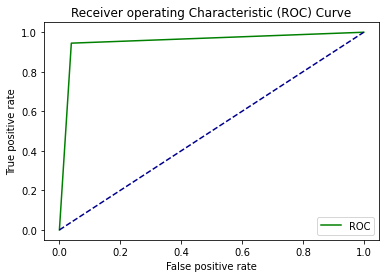

In [70]:
plt.plot(fpr, tpr, color = 'green', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SAVING OUR MODEL AND DO PREDICTION ON TEST DATASET

In [71]:
import joblib
joblib.dump(rf, "final_model")

['final_model']

In [72]:
model = joblib.load("final_model")

In [73]:
test_df = pd.read_csv('test.csv')

In [74]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [76]:
test_df = test_df.drop(['ID', 'default'], axis = 1)

In [77]:
test_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [78]:
cat_col = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
test_df = pd.get_dummies(test_df, columns=cat_col, drop_first = True)

test_df.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,yes,no,15,20,6,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,no,no,1,372,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,yes,no,16,676,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,yes,no,13,65,2,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,no,yes,3,111,1,-1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [80]:
yes_no_mapping = {'yes': 1, 'no': 0}
columns_to_map = ['loan', 'housing']  
test_df[columns_to_map] = test_df[columns_to_map].replace(yes_no_mapping)


In [81]:
test_df.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,1,0,15,20,6,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,0,0,1,372,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,1,0,16,676,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,1,0,13,65,2,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,0,1,3,111,1,-1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [82]:

predictions = model.predict(test_df)

# Print the predictions
print(predictions)


[0 0 0 ... 0 1 0]


In [83]:
prediction_df = pd.DataFrame(predictions, columns=['Prediction'])

In [84]:
result_df = pd.concat([test_df, prediction_df], axis=1)

In [85]:
result_df.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Prediction
0,32,118,1,0,15,20,6,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,78,2787,0,0,1,372,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,31,144,1,0,16,676,1,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,57,3777,1,0,13,65,2,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,45,-705,0,1,3,111,1,-1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [86]:
result_df['Prediction'].value_counts()

0    12253
1     1311
Name: Prediction, dtype: int64